In [102]:
from sklearn.datasets import make_classification
X, Y = make_classification(n_features=2, n_informative=2, n_redundant=0, n_classes=2)

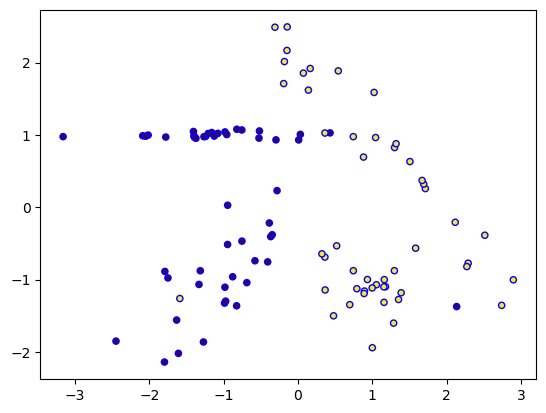

In [103]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], marker = "o", c = Y, s=20, edgecolor="b")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

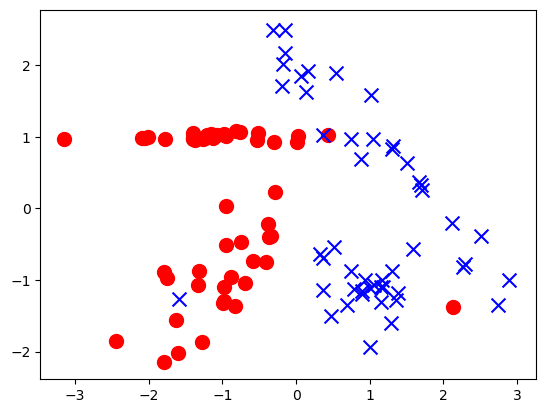

In [104]:
plt.scatter(X[:,0][Y==0], X[:,1][Y==0], marker="o",c="r", s=100)
plt.scatter(X[:,0][Y==1], X[:,1][Y==1], marker="x",c="b", s=100)
plt.show

In [105]:
[Y==0]

[array([False,  True, False, False,  True, False, False,  True,  True,
         True, False,  True,  True, False,  True, False, False, False,
        False,  True, False,  True, False,  True, False,  True,  True,
         True, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False, False,  True,  True, False, False, False,
        False,  True,  True,  True,  True, False, False, False, False,
         True, False, False,  True, False,  True, False, False,  True,
         True,  True, False, False,  True, False,  True, False,  True,
         True,  True, False, False, False,  True, False, False,  True,
         True,  True, False, False, False,  True,  True, False,  True,
        False, False, False, False,  True, False, False,  True,  True,
        False])]

In [106]:
type(Y)

numpy.ndarray

In [107]:
import numpy as np
class hypothesis(object):
    "Модель логической регрессии"
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        self.b2 = 1
    def predict(self, X):
        x1, x2 = X
        z = self.b0 + self.b1 * x1 + self.b2 * x2
        return 1/(1 + np.exp(-z))
    def error(self, X, Y):
        return-sum(Y * np.log2(self.predict(X)) + (1 - Y)*(1-np.log2(self.predict(X))) / len(X[0]))
    def BGD(self, X, Y):
        alpha = 0.5
        for _ in range(1000):
            dJ0 = sum(self.predict(X) - Y)/ len(X)
            dJ1 = sum((self.predict(X) - Y)* X[0])/ len(X)
            dJ2 = sum((self.predict(X) - Y)*X[1])/ len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            self.b2 -= alpha * dJ2

In [108]:
Y.shape

(100,)

In [109]:
hyp = hypothesis()
hyp.predict(X.T)
J = hyp.error(X.T, Y)
print("initial error", J)

initial error 65.4052751424786


In [110]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[0]-1, X.max(axis=0)[0]+1, 0.01),
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1,2))

In [111]:
#hyp.BGD(X.T, Y)
Z = hyp.predict(XX.T)
Z = Z.reshape(xx.shape)

<function matplotlib.pyplot.show(*args, **kw)>

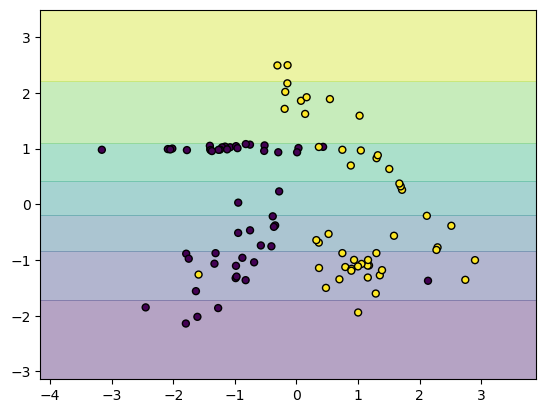

In [112]:
plt.contourf(xx, yy, Z, alpha = 0.4)
plt.scatter(X[:,0], X[:,1], marker="o",c=Y, s=25, edgecolor="k")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

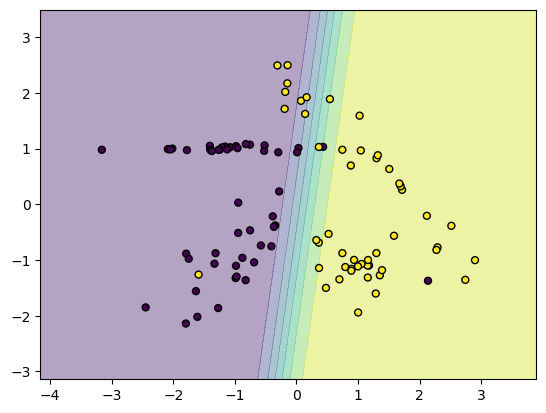

In [113]:
hyp.BGD(X.T, Y)

Z = hyp.predict(XX.T)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha = 0.4)
plt.scatter(X[:,0], X[:,1], marker="o",c=Y, s=25, edgecolor="k")
plt.show

In [114]:
hyp.b0, hyp.b1, hyp.b2

(-0.5104413073305021, 5.40894307456024, -0.6963646278559574)